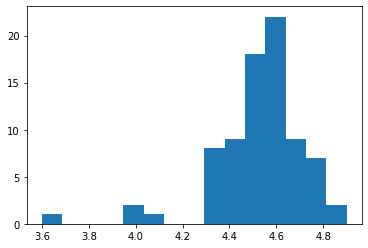

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import plotly.express as px



df = pd.read_csv(r'C:\Users\lingg\Desktop\NYC Data Science\Boot Camp\Python\Web_Scraping_project\amazon_product\amazon_product.csv')
group = df.groupby('category')
# a = group.size()
# a[[0]]
# grph1 = plt.subplots()
# grph1.pie = (group)
# plot = df.plot.pie(y = group.size())
# plot
# for item in group:
#     print(item)
plt.hist(df['rating star'],bins = 15)


df1 = pd.read_csv(r'C:\Users\lingg\Desktop\NYC Data Science\Boot Camp\Python\Web_Scraping_project\amazon_product\amazon_product_review.csv', names = ['product_title','asin','review_title','content','user_name','date','rating star'])
df1.date = pd.to_datetime(df1.date.replace({'Reviewed in the United States on ':''},regex = True))

df2 = df[['asin','category']]

df3 = pd.merge(df1,df2,on='asin')   # test_df = df3


df4 = df3.groupby(['category','date'])['review_title'].size()    # test_2 = df4
fig5 = px.line(df4.reset_index(),x = 'date',y = 'review_title',facet_col = 'category',facet_col_wrap=3,labels=dict(review_title="Reviews"),
             title = "Number of Reviews from Oct.2019 to Oct.2020")
fig5.update_layout(margin=dict(t=30, b=30, l=30, r=30), legend = dict(font=dict(family = "Courier", size = 15, color = 'black')))
fig5.show()
# fig6 = px.line(df3.groupby(['category','date'])['review_title'].size(), y = 'date', color = 'category')
# fig6.show()


df3['month_year'] = pd.to_datetime(df3['date']).dt.to_period('M')
test_oct = df3[df3['month_year'] == '2020-10'].groupby('category').size()
test_sep = df3[df3['month_year'] == '2020-9'].groupby('category').size()
test_aug = df3[df3['month_year'] == '2020-8'].groupby('category').size()
test_july = df3[df3['month_year'] == '2020-7'].groupby('category').size()
df_sales = pd.concat([test_oct,test_sep,test_aug,test_july],axis=1)        # test_sales = df_sales


test_sales_1 = df_sales.reset_index()
test_sales_1.columns = ['category','October','September','August','July']

test_sales_1

fig6 = px.bar(test_sales_1 ,y = 'category', x = test_sales_1.columns[1:], barmode = 'group', orientation = 'h', text = 'value',
            labels=dict(value="Number of Reviews"))
fig6.update_traces(texttemplate='%{text:.4}', textposition='outside')
fig6.update_layout(margin=dict(t=0, b=0, l=0, r=0))
fig6.show()


test_sales_1['mean'] = test_sales_1.mean(axis=1)
test_sales_1['std'] = test_sales_1.std(axis=1)
test_sales_1['sales'] = test_sales_1['mean']*50
test_sales_1.sales

fig7 = px.bar(test_sales_1, x = 'category' , y ='sales',labels=dict(sales="Sales Volume"),text = 'sales',color = 'category',
             title = "Average Monthly Sales Volume from July - October 2020 ")
fig7.update_traces(texttemplate='%{text:.4}', textposition='outside')
fig7.show()


fig1 = px.pie(df.groupby('category'),values = group.size(), names = group.groups.keys(), title ='Propotion of Top 100 Best Selling in Cell Phone & Accessory')
fig1.update_layout(margin=dict(t=30, b=30, l=30, r=30), legend = dict(font=dict(family = "Courier", size = 15, color = 'black')))
fig1.show()


fig2= px.histogram(df, x = 'rating star')
fig2.update_layout(title="Histogram of Top 100 BS Rating", bargroupgap=0.1)
fig2.show()


fig3 = px.box(df, x = 'category' , y = 'rating star', title = 'Category vs. Rating Star', color = 'category')
fig3.update_layout(margin=dict(t=30, b=30, l=30, r=30))
fig3.show()

fig4 = px.box(df, x = 'category' , y = 'price',  title = 'Category vs. Price', color = 'category')
fig4.update_layout(margin=dict(t=30, b=30, l=30, r=30))
# fig.add_shape(type='line',y0= 10, y1 = 30, line = dict(color = 'RoyalBlue', width = 1))
# fig.add_hline(y=0)
fig4.show()



